# Python Machine Learning for Biology


# Python Machine Learning in Biology
# Neural Networks 

In [147]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Import and Explore the Data
First we will import the MNIST fashion dataset, which consists of images and labels of what clothing item is in the images. We'll also split the data into training and test sets. 

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

*(This might take a while to load)*


In [157]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image of clothing corresponds to a single label. The names of the classes aren't included in this dataset, so let's store them here as a list so we can use them later.

In [159]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

There are 60,000 images in the training set. Each image is represented as 28 x 28 pixels. 

There are 60,000 labels in the training set. Remember these correspond to the clothing identified in the image. 

Each label is an integer between 0 and 9, which corresponds to an item of clothing. 

The test set has 10,000 images. Each image is represented as 28 x 28 pixels.

The test set has 10,000 images.

Let's take a look at the first image in the training data set. The pixel values fall between 0 and 255. 

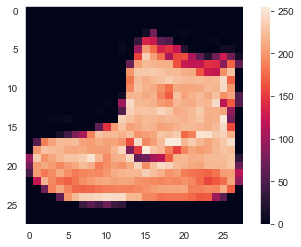

In [165]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocess
We'll scale these values so they fall between 0 and 1 before feeding them into our neural network (those numbers will play more nicely and will converge faster). We'll do this by dividing the values by 255. It's important we do this preprocessing to both our training and test dataset. 

Let's take a look at the first 25 images and their class names from the training set. 

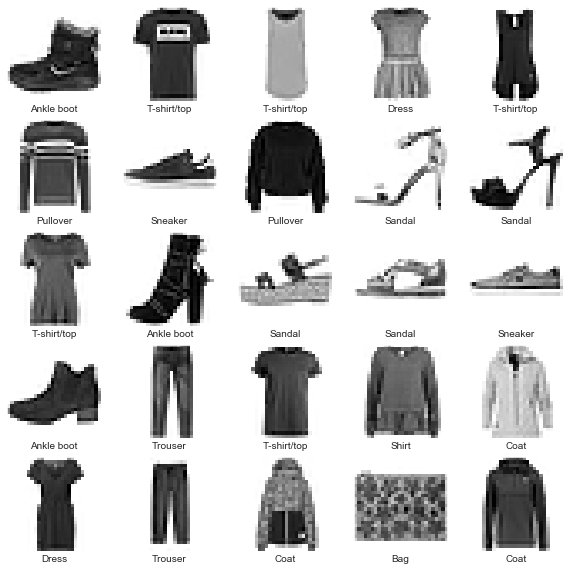

In [167]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the Model

To build our model, we will configure the layers of the model and then compile the model. 

Let's set up our layers first. The layer is the basic building block of our neural network. The layer will extract representations (features) from the data fed into them. We can chain together layers to form a deep learning model with the architecture we want. These layers will learn the model's parameters during training.

`tf.keras.layers.Flatten` is our first layer in our network. It transforms the images from a 2D array of 28x28 pixels to a 1D array of 784 pixels. This layer isn't learning any parameters--it is just reformatting our data.

Then we have a sequence of two `tf.keras.layers.Dense layers`. These are fully-connected (dense) neural layers. The first one has 128 nodes (aka neurons). The second is our last layer and returns an array of length 10. Each number in this array that is returned indicates how the class that the image corresponds to (according to the model).  

### Compile the Model
The compile step has us add in a few more hyperparameters. 
* Optimizer: this is how the model updates based on the data it sees and the loss function at that step
* Loss function: measures how accurate the model is during training. This is what we are trying to minimize.
* Metrics: this is out how we want to evaluate the model at each step. 

### Train the Model
To train the neural network, we'll put in the training data (input and output) into the model. Epochs refers to how many times we pass the data forward and backward through the neural network. 

We'll call `model.fit()` to fit the model to our training data (have it learn associations between the images and the labels). The loss and accuracy metrics will display as the model fits. 

### Evaluate the Model
Let's take a look at the accuracy on the test dataset. If this is less than the training accuracy (performs worse on new data it hasn't seen versus stuff it has seen), we can suspect our model has overfit. In this case we may have memorized the noise and not the signal in the training dataset. 

### Make Predictions
Now that we have a model trained, we can use it to make predictions about the images we didn't use in the training (the test images). Our model will give logits as outputs, which are linear. If we convert these using the softmax layer, they'll be probabilities, which are easier for us to interpret. 

The model will predict a label for each image in the testing set. Let's take a look at one. 

Each prediction is an array of 10 numbers, each of which represent the model's "confidence" that the image corresponds to the 10 different types of clothing. Let's see which of the labels has the highest confidence value.

The model is most confident in predicting the image is an ankle boot (class 9). If we look at the label in the test set, we can check its guess.

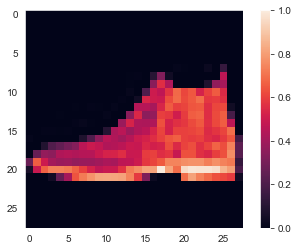

In [181]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Here is a function that will help us graph the full set of class predictions. Correct prediction labels will be in blue. Incorrect prediction labels will be in red. 

In [185]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

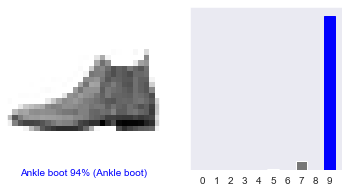

In [186]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

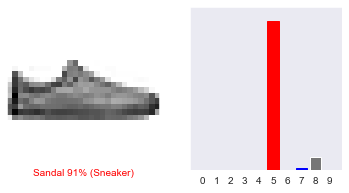

In [187]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

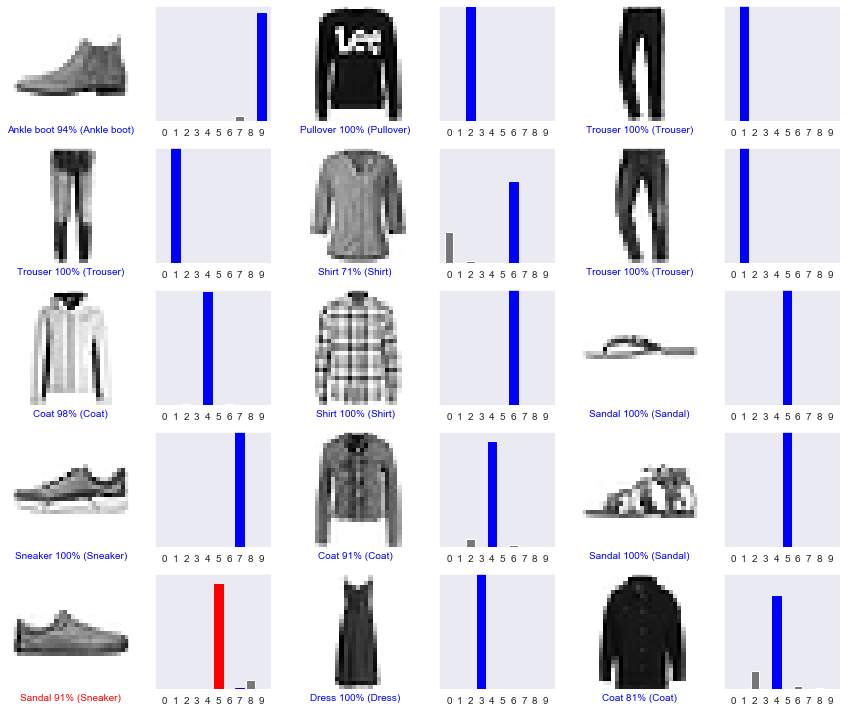

In [188]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Independent Exercises

### Neural Network
Fit a neural network classifier to the MNIST handwritten digits dataset. 